# Baseball Case Study

# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features:
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output:
Number of predicted wins (W)

# import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore



# Loading Data set

In [2]:
df=pd.read_csv('baseball.csv')

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
df.shape

(30, 17)

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<AxesSubplot:>

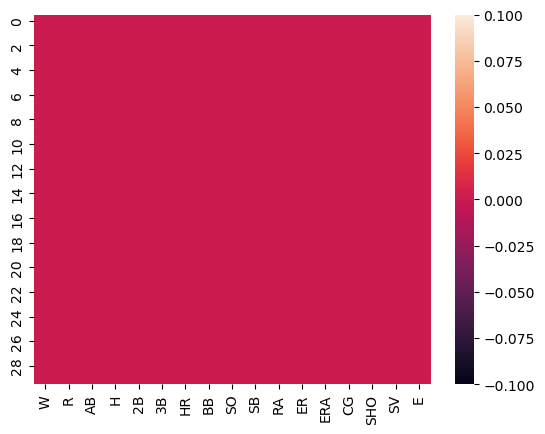

In [12]:
#visualize null value using heatmap
sns.heatmap(df.isnull())

No null value is present in this data

# visualization

#16 feature to visualize

R: Runs,

AB: At Bats

H: Hits

2B: Doubles

3B: Triples

HR: Homeruns

BB: Walks

SO: Strikeouts

SB: Stolen Bases

RA: Runs Allowed

ER: Earned Runs

ERA: Earned Run Average (ERA)

CG: Complete game
    
SHO:shutout    

SV: Saves,

SV: Complete Games

E: Errors

W: Win

Data Analysis

In [13]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


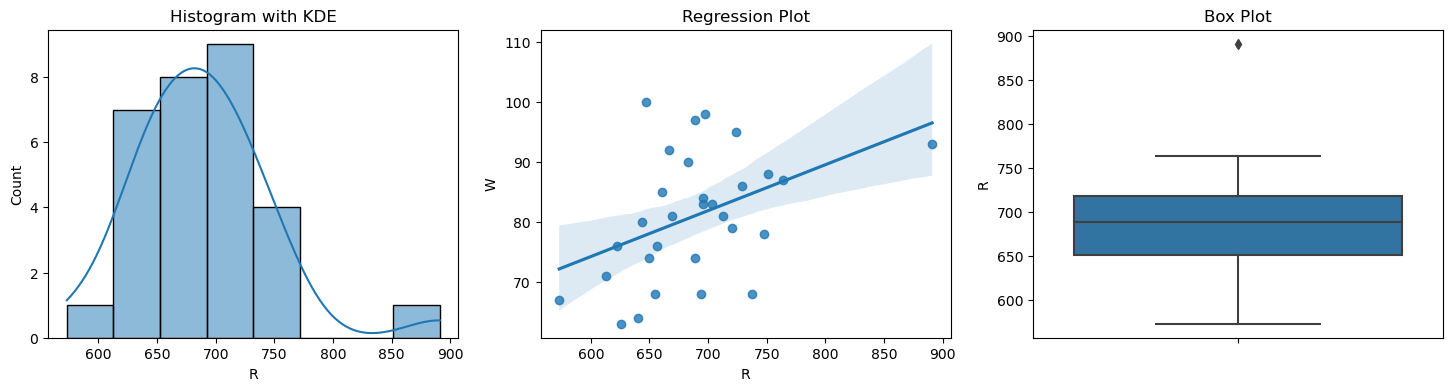

In [14]:
# Select the feature to visualize
feature_name = 'R'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Here Run and Win are highly corelated and outliers are present above 850. 

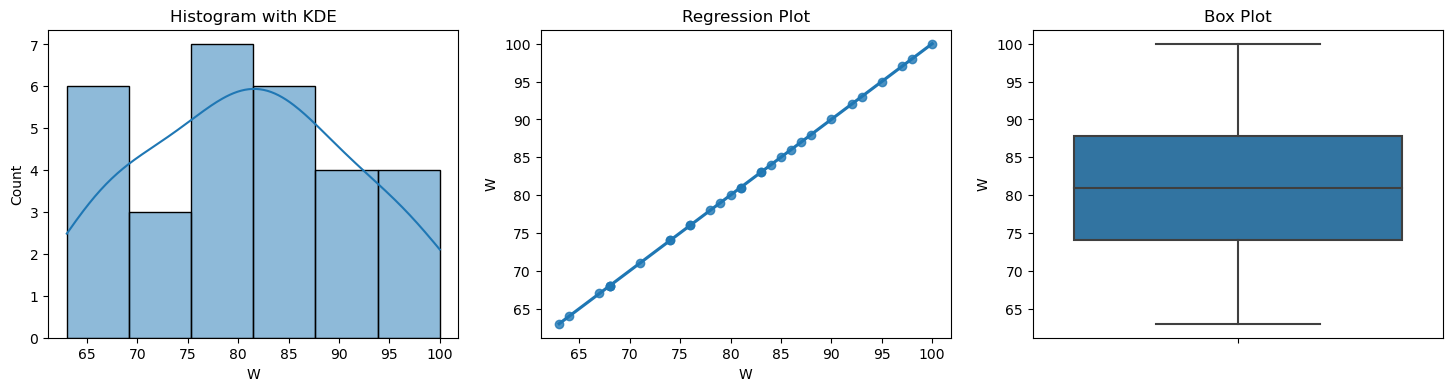

In [15]:
 #Select the feature to visualize
feature_name = 'W'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

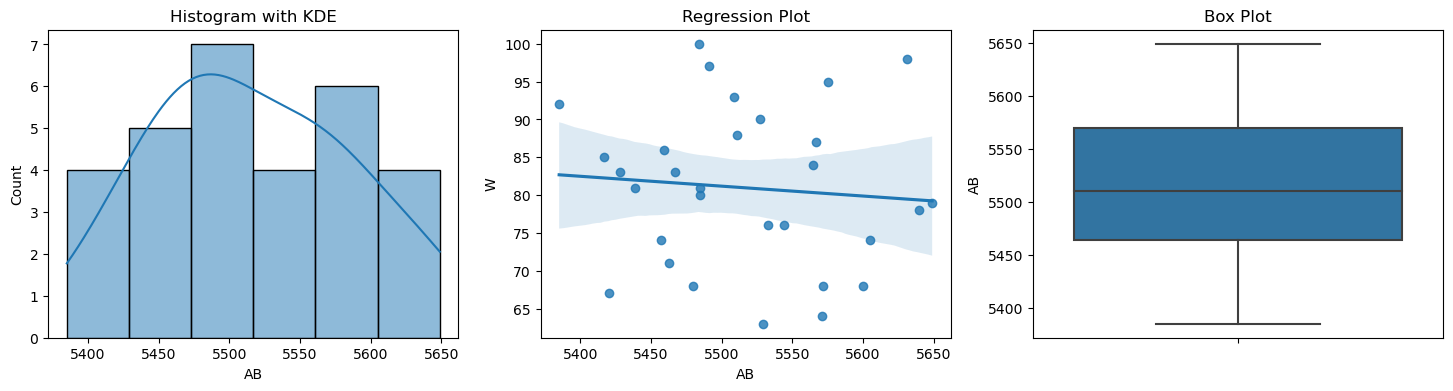

In [16]:
 #Select the feature to visualize
feature_name = 'AB'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

At balls(AB) is very weekly related to Wins Without outliers.

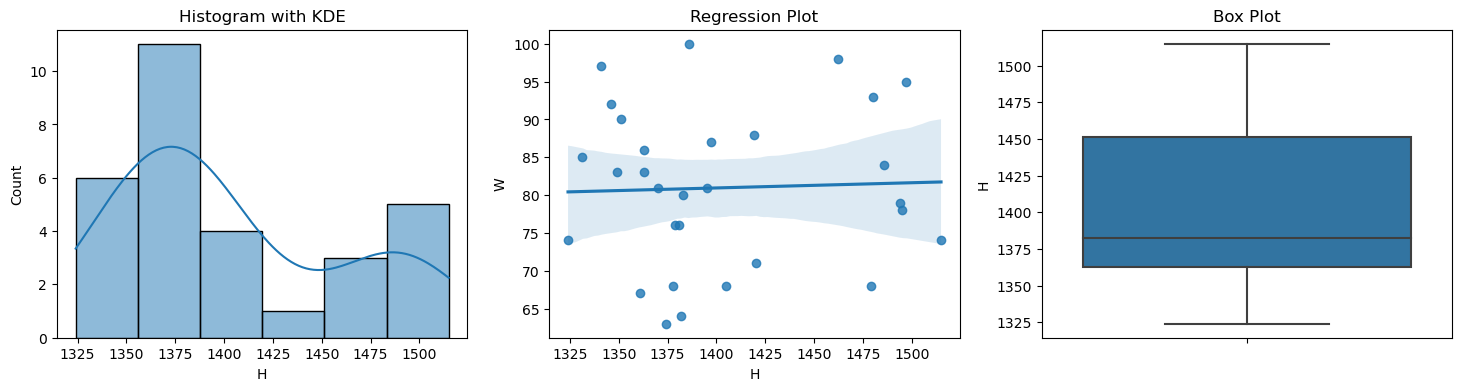

In [17]:
 #Select the feature to visualize
feature_name = 'H'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Hits (H)are weakly corelated to Win without any outlier.

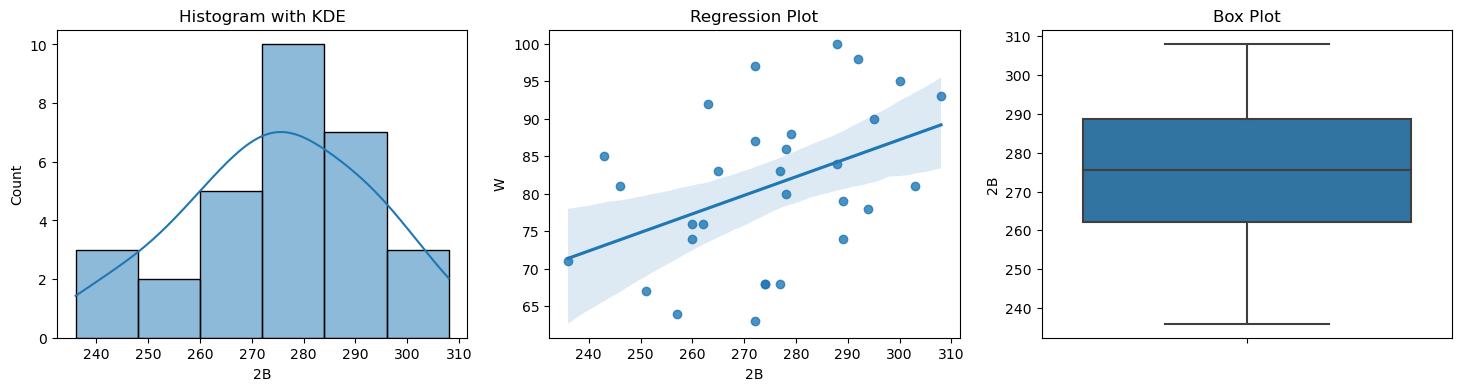

In [18]:
 #Select the feature to visualize
feature_name = '2B'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Doubles are linearly related with Wins, with no outlier, and data is left-skewed

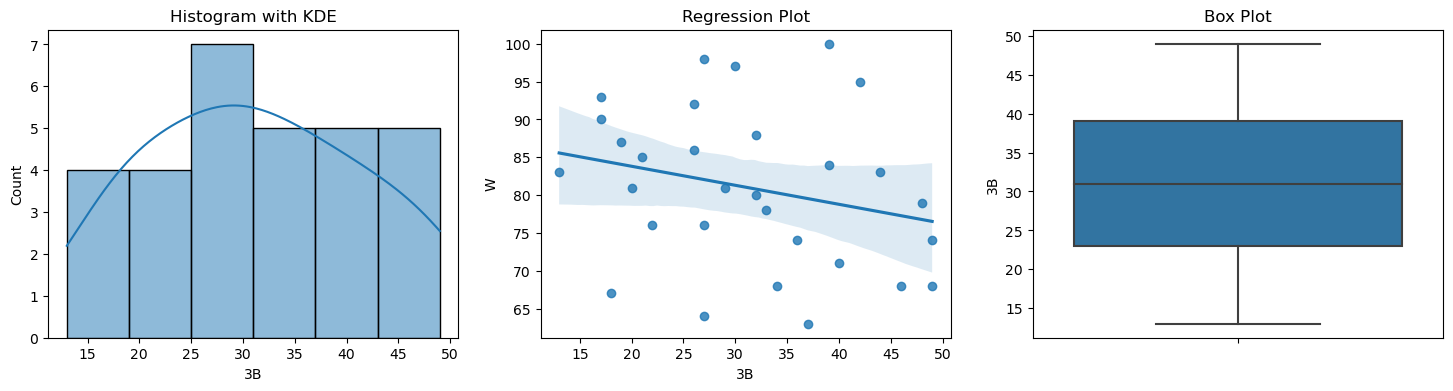

In [19]:
 #Select the feature to visualize
feature_name = '3B'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Triple has very weak negative correlations with win with no outlier and data is right-skewed



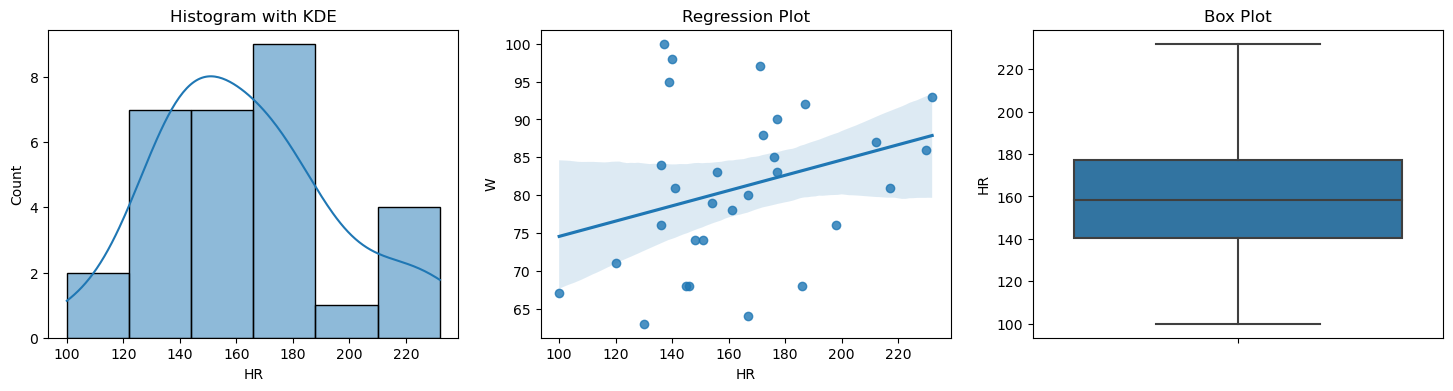

In [20]:
 #Select the feature to visualize
feature_name = 'HR'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

The home run has a very low correlation with wins with no lot of outliers and data is right-skewed

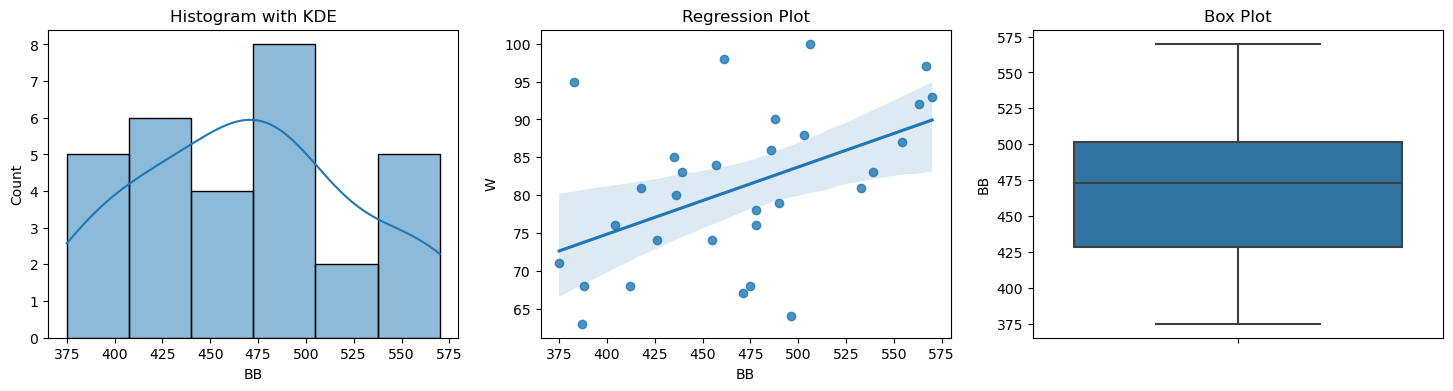

In [21]:
 #Select the feature to visualize
feature_name = 'BB'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Walk is very low correlated to win with no outlier

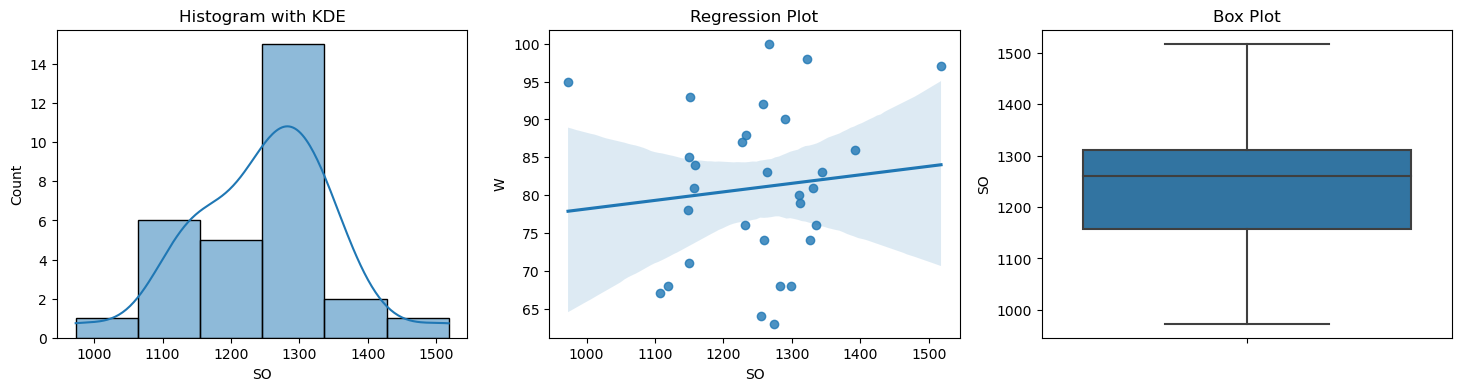

In [22]:
 #Select the feature to visualize
feature_name = 'SO'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Strikeout non correlated to win with no outlier and the dataset is left-skewed.

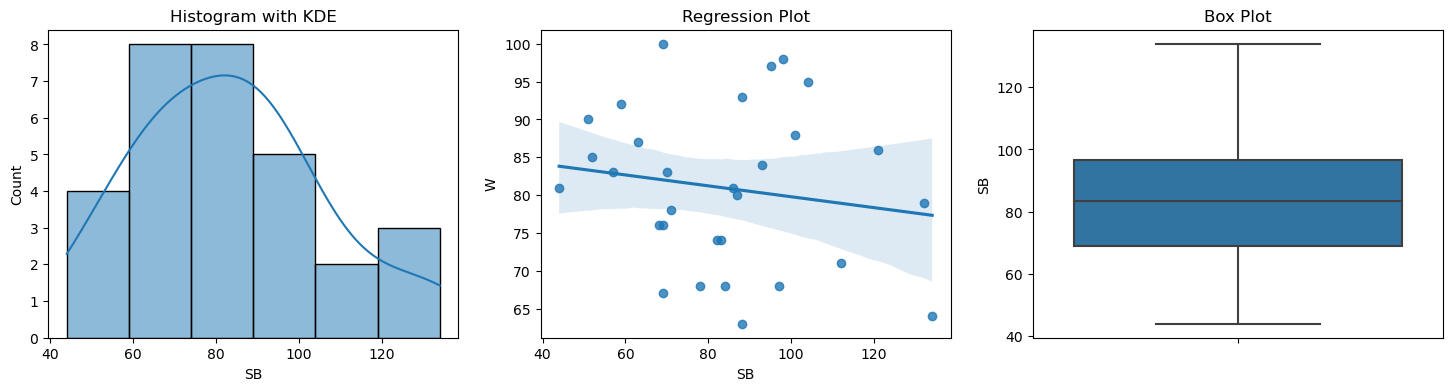

In [23]:
 #Select the feature to visualize
feature_name = 'SB'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

stolen Bases(SB) is not correlated to win with no outlier


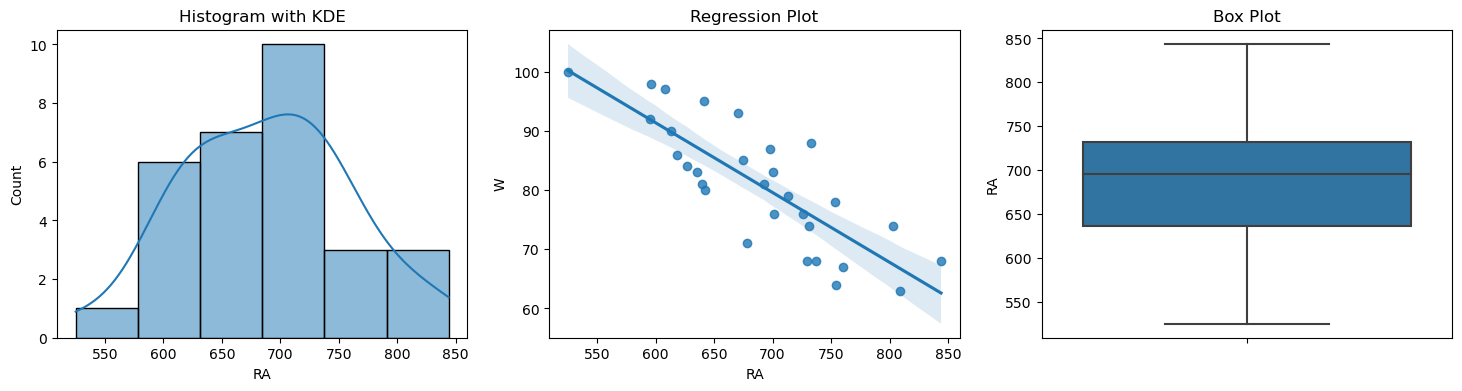

In [24]:
 #Select the feature to visualize
feature_name = 'RA'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

In [ ]:
Runs Allowed is highly correlated to win with no outliers

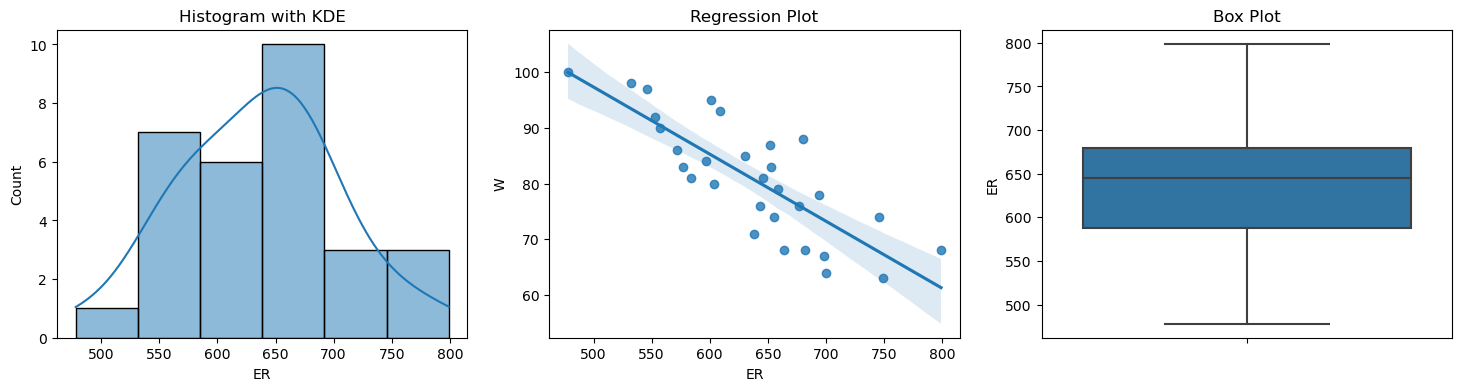

In [25]:
 #Select the feature to visualize
feature_name = 'ER'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Earned Runs is highly correlated to win with no outliers



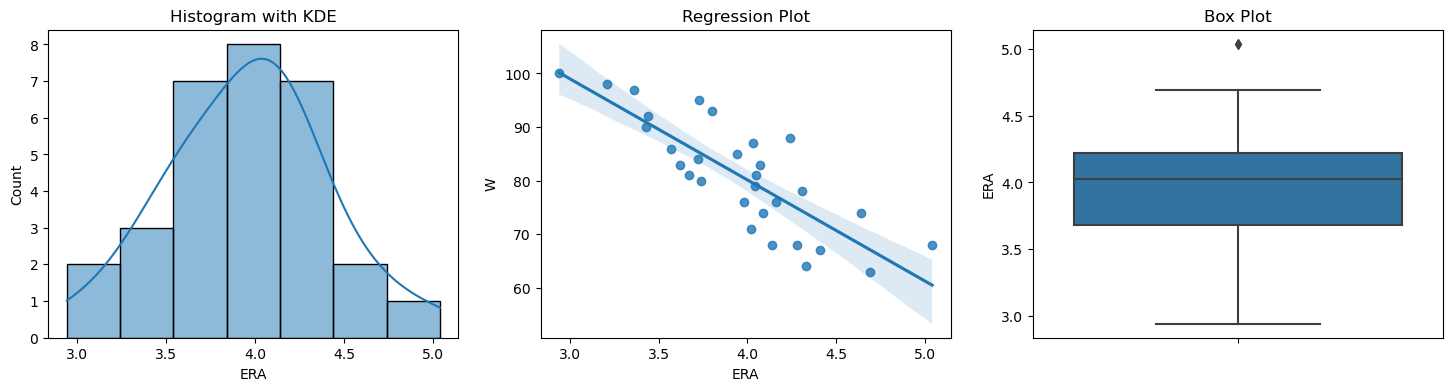

In [26]:
 #Select the feature to visualize
feature_name = 'ERA'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Earned Run Average (ERA) is not correlated to win with no outliers and data is right-skewed.

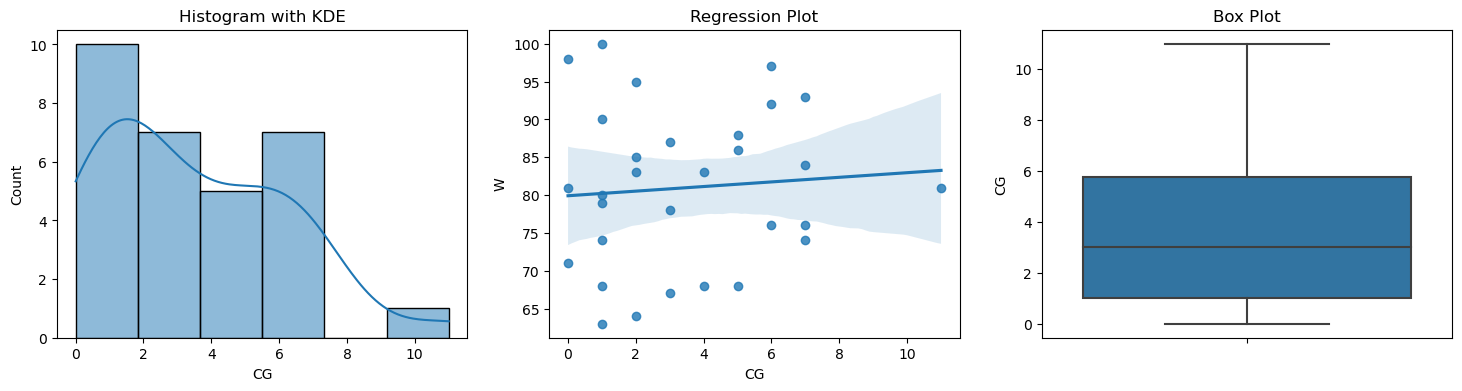

In [27]:
 #Select the feature to visualize
feature_name = 'CG'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

complete Game(CG) is not correlated to win with no outlier

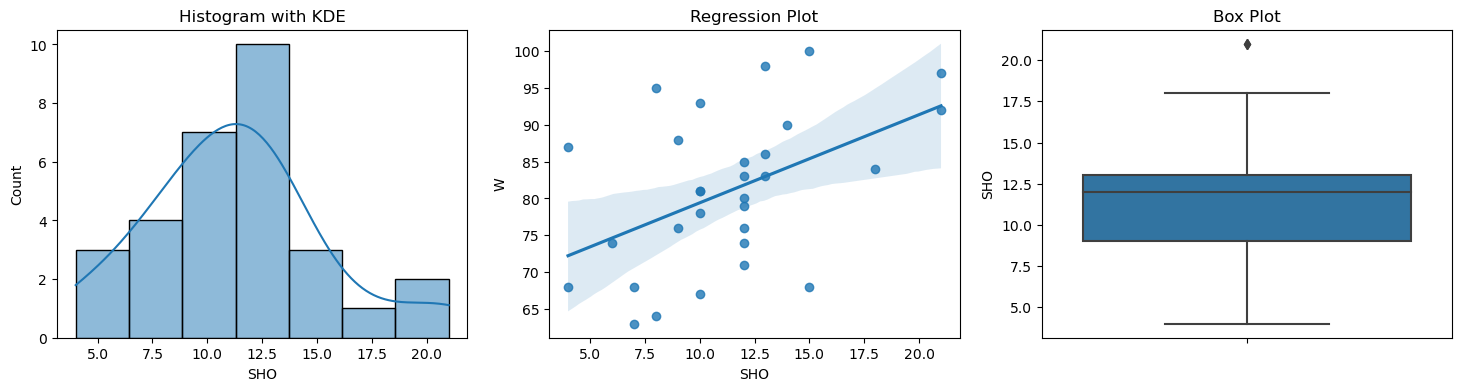

In [28]:
 #Select the feature to visualize
feature_name = 'SHO'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Shutouts(SHO) are highly correlated to win with no outliers and data is right-skewed.

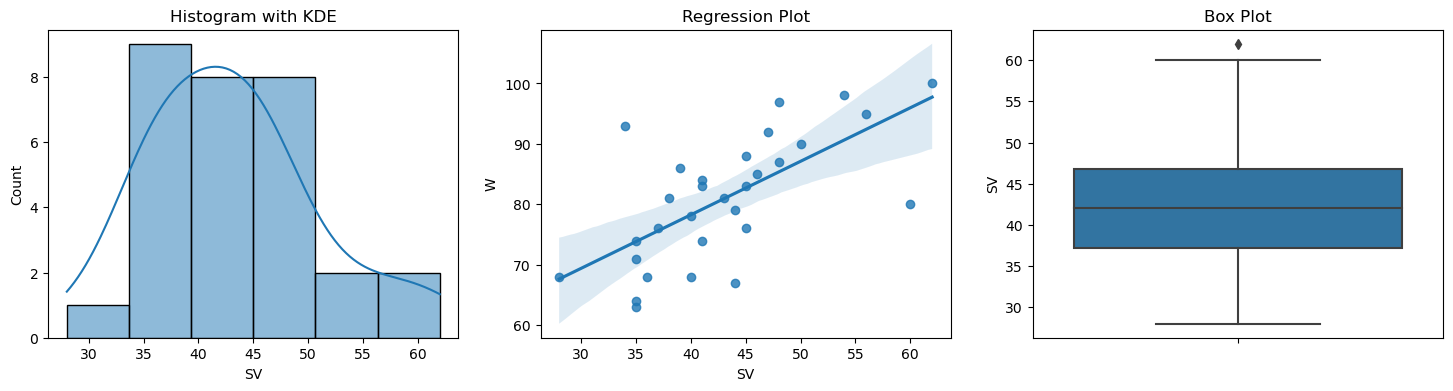

In [29]:
 #Select the feature to visualize
feature_name = 'SV'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

Saves(SV) are lightly correlated to win with no outliers-skewed.



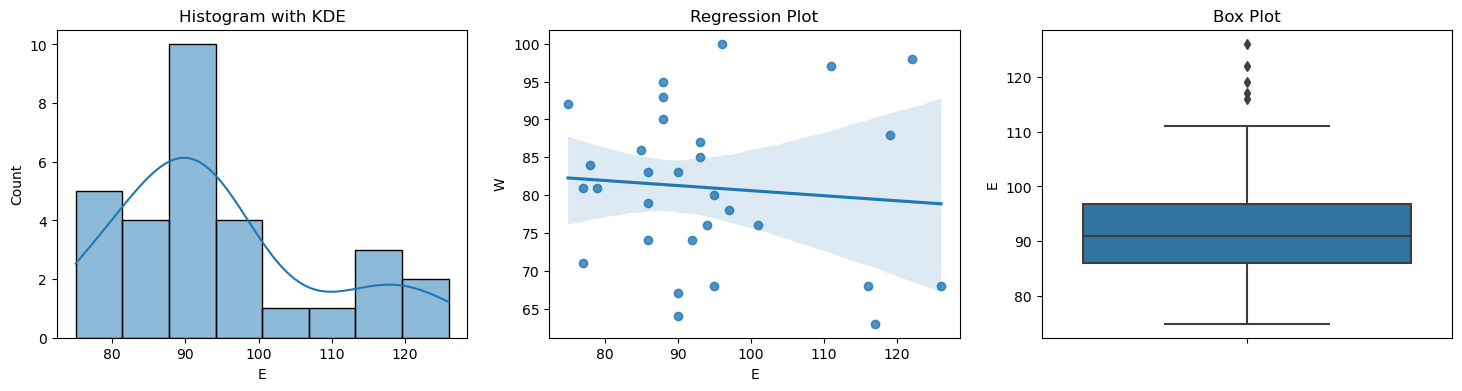

In [30]:
 #Select the feature to visualize
feature_name = 'E'

# Create subplots for three different types of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot 1: Histogram with KDE
sns.histplot(df[feature_name], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram with KDE')

# Plot 2: Regression Plot
sns.regplot(x=feature_name, y='W', data=df, ax=axes[1])
axes[1].set_title(f'Regression Plot')

# Plot 3: Box Plot
sns.boxplot(y=feature_name, data=df, ax=axes[2])
axes[2].set_title(f'Box Plot')

plt.show()

outliers are present .Error(E) are not corelated to Win(W).and showing right skewness.

outcome

 highly positively linearly correlated with no of Wins :
        The number of runs, home runs, doubles, Saves, Shutouts, Walks 

highly negative linearly correlated with no of Wins:
    Stolen Bases, Runs Allowed, Earned Runs

The remaining feature: less to no linear correlation with no of Wins



Check Skewness:

In [31]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Outcome of Skewness

In [32]:
print('The thershold value for skewness- +0.5 to -0.5. outside this value considered as skew')

#Some of the feature column 
print('Some of the feature column:')

# Lists of skewed and non-skewed features
skewed_feature = ['Runs (High)', 'Hits', 'Homeruns (Very few)', 'Complete Games (few)', 'Shutouts (Very few)', 'Saves (few)', 'Errors']
no_skewed_feature = ['At Bats', 'Doubles', 'Triples', 'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average']

# Make the two lists the same length by adding None for the missing items

max_length = max(len(skewed_feature), len(no_skewed_feature))
skewed_feature.extend([None] * (max_length - len(skewed_feature)))
no_skewed_feature.extend([None] * (max_length - len(no_skewed_feature)))

data = {
    "SKEWED": skewed_feature,
    "NON SKEWED": no_skewed_feature
}

df_skew = pd.DataFrame(data)

# Display the DataFrame
print(df_skew)


        

The thershold value for skewness- +0.5 to -0.5. outside this value considered as skew
Some of the feature column:
                 SKEWED          NON SKEWED
0           Runs (High)             At Bats
1                  Hits             Doubles
2   Homeruns (Very few)             Triples
3  Complete Games (few)               Walks
4   Shutouts (Very few)          Strikeouts
5           Saves (few)        Stolen Bases
6                Errors        Runs Allowed
7                  None         Earned Runs
8                  None  Earned Run Average


# Data Cleaning

# Removing Outlier

Zscore

In [33]:

# Select the feature(s) you want to use for outlier removal
feature_names = ['W','R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

z = np.abs(zscore(df))
z.shape



(30, 17)

In [34]:
thershold = 3
print (np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [35]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


Data lost percentage

In [36]:
Data_loss = ((30-29)/30)*100
print ('Percentage of Data Lost is: ',Data_loss)

Percentage of Data Lost is:  3.3333333333333335


separate feature and target 

In [37]:
x = df_new.drop(['W'], axis=1)
y = df_new['W']

# Remove Skewness

In [38]:
from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

# Model Training

Data Preprocessing

In [40]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score


# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Print the coefficients and intercept
print(f"Linear coefficients : {model.coef_}")
print(f"Intercept : {model.intercept_}")


Linear coefficients : [ 4.33732257e+00  2.62012634e-14 -1.42108547e-14 -1.67034149e+00
  1.04795831e+00 -4.40106911e-01 -1.88112960e+00 -7.64409044e-01
 -7.51289460e-01  1.98476749e+01 -1.35215749e+01 -1.21022080e+01
  2.19720648e+00  4.59206091e-01  5.49849420e+00 -1.54809197e+00]
Intercept : 80.76334910905743


In [54]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 23.384834058726483
Root Mean Squared Error (RMSE): 4.835786808651358
R-squared (R2): 0.7572508575218704


# RandomForestRegressor

In [74]:

from sklearn.ensemble import RandomForestRegressor
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred 




array([77.33, 90.53, 76.74, 74.95, 75.12, 76.26])

In [75]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y1_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 43.803649999999976
Root Mean Squared Error (RMSE): 4.373312398662838
R-squared (R2): 0.5452908304498272


# Ridge Regression model

In [60]:
from sklearn.linear_model import Ridge
# Create a Ridge Regression model 
rid = Ridge()
rid.fit(x_train, y_train)

# Print the coefficients and intercept
print(f"Ridge Coefficients: {rid.coef_}")
print(f"Intercept: {rid.intercept_}")

# Predicting the new result
rid_pred = rid.predict(x_test)
rid_pred


Ridge Coefficients: [ 3.5332237   0.          0.          0.03593102  0.34091112 -0.4535961
 -0.68936084 -0.5103201  -1.08014143 -0.57862729 -1.98711485 -3.14800455
  0.85019607  0.51255218  3.79372107 -0.31497427]
Intercept: 80.25604392921258


array([74.01144231, 88.76903867, 76.53978319, 69.40242728, 80.56477015,
       82.13781235])

In [62]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rid_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, rid_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 19.125861336298104
Root Mean Squared Error (RMSE): 4.373312398662838
R-squared (R2): 0.8014616470280473


# KNeighborsRegressor model

In [66]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor model
n_neighbors = 5  # You can adjust the number of neighbors
model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred



array([70.8, 87.8, 81.4, 71.2, 74.4, 76.2])

In [67]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 48.98
Root Mean Squared Error (RMSE): 4.373312398662838
R-squared (R2): 0.4915570934256055


Lower MSE and RMSE values indicate better predictive accuracy. In this case, Linear Regressor and Ridge Regression have the lowest MSE values, with Ridge Regression having the best RMSE.

Higher R2 values suggest a better ability of the model to explain the variance in the target variable. Ridge Regression has the highest R2 value, indicating that it explains the most variance.

Based on these metrics, 
Ridge Regression appears to be the best-performing model in terms of RMSE and R-squared, providing a good balance between prediction accuracy and explaining variance. However, the choice of the "best" model may also depend on the specific requirements and context of our problem. 

# Hyperparameter tuning 

Ridge Regression model

In [96]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create the Ridge Regression model
ridge = Ridge()

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']

# Create a Ridge Regression model with the best alpha
best_ridge = Ridge(alpha=best_alpha)

# Fit the model on the training data and evaluate it
best_ridge

Ridge(alpha=10.0)

In [99]:
# Fit the model on the training data
best_ridge.fit(x_train, y_train)

# Predict on the test data
ridge_pred = best_ridge.predict(x_test)

# Calculate Mean Squared Error (MSE) for the best Ridge model
mse = mean_squared_error(y_test, ridge_pred)

# Calculate R-squared (R2) for the best Ridge model
r2 = r2_score(y_test, ridge_pred)

print("Best Ridge Model - Mean Squared Error (MSE):", mse)
print("Best Ridge Model - R-squared (R2):", r2)

Best Ridge Model - Mean Squared Error (MSE): 31.009671672263618
Best Ridge Model - R-squared (R2): 0.6781002940595473


RandomForestRegresso

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest Regressor model with the best hyperparameters
best_rf = RandomForestRegressor(random_state=42, **best_params)

# Fit the model on the training data
best_rf.fit(x_train, y_train)

# Make predictions on the test data
rf_pred = best_rf.predict(x_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print("Best Random Forest Model - Mean Squared Error (MSE):", mse)
print("Best Random Forest Model - R-squared (R2):", r2)


Best Random Forest Model - Mean Squared Error (MSE): 44.199743839186006
Best Random Forest Model - R-squared (R2): 0.5411791296970311


# So, as per the final observations we can say that the best model is RidgeRegressor.

# Save the Model

In [105]:
filename = 'baseball_case_study.pkl'
joblib.dump(rid, filename)

['baseball_case_study.pkl']

# conclusion

In [106]:

# Get the original target values as a NumPy array
a = np.array(y_test)

# Get the predicted values from the Ridge Regression model
predicted = np.array(rid.predict(x_test))

# Create a DataFrame to compare the original and predicted values
df_conclusion = pd.DataFrame({"Original": a, "Predicted": predicted})



# Display the DataFrame
print(df_conclusion)


   Original  Predicted
0        74  74.011442
1        97  88.769039
2        76  76.539783
3        67  69.402427
4        78  80.564770
5        88  82.137812


# visualize

This allows us to visually inspect how well our model is performing by comparing the actual values (Original) with the predicted values (Predicted). In this case, it appears that our model is doing a reasonable job of predicting the target variable.

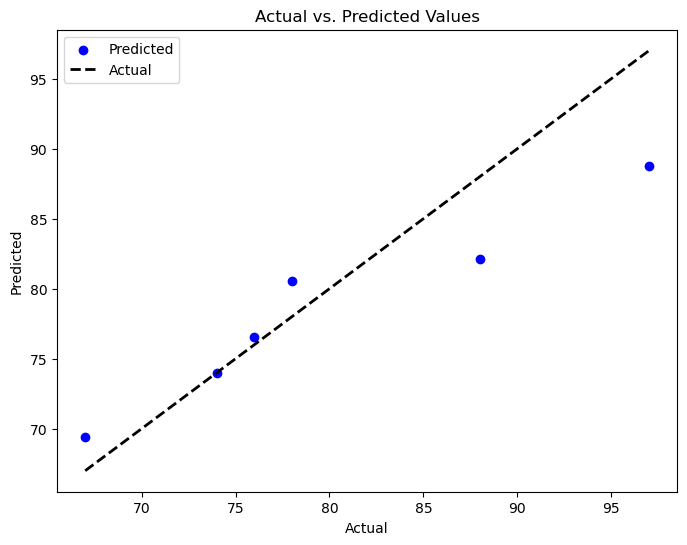

In [107]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_conclusion with 'Original' and 'Predicted' columns
plt.figure(figsize=(8, 6))
plt.scatter(df_conclusion['Original'], df_conclusion['Predicted'], c='b', label='Predicted')
plt.plot([df_conclusion['Original'].min(), df_conclusion['Original'].max()], [df_conclusion['Original'].min(), df_conclusion['Original'].max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
